<a href="https://colab.research.google.com/github/martingrzzler/colab-notebooks/blob/master/simple_rnn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf
from tensorflow.keras.layers import Input, SimpleRNN, Dense, Flatten
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import SGD, Adam

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

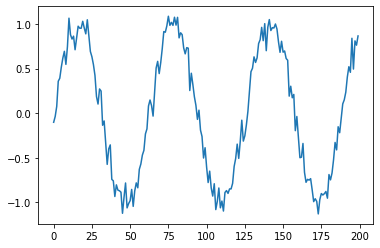

In [ ]:
series = np.sin(0.1 * np.arange(200)) + np.random.randn(200) * 0.1
plt.plot(series)
plt.show()

In [ ]:
T = 10
D = 1
X = []
Y = []

for t in range(len(series) - T):
  x = series[t:t+T]
  X.append(x)
  y = series[t+T]
  Y.append(y)

X = np.array(X).reshape(len(X), T, 1)
Y = np.array(Y)
N = len(X)

print("X.shape", X.shape, "Y.shape", Y.shape)

X.shape (190, 10, 1) Y.shape (190,)


In [ ]:
i = Input(shape=(T, 1))
x = SimpleRNN(5, activation=None)(i)
x = Dense(1)(x)
model = Model(i, x)

model.compile(loss='mse', optimizer=Adam(learning_rate=0.01))

In [ ]:
r = model.fit(X[:-N//2], Y[:-N//2], epochs=80, validation_data=(X[-N//2:], Y[-N//2:]))

Epoch 1/80
3/3 [==============================] - 1s 127ms/step - loss: 0.1119 - val_loss: 0.0868
Epoch 2/80
3/3 [==============================] - 0s 21ms/step - loss: 0.1065 - val_loss: 0.0412
Epoch 3/80
3/3 [==============================] - 0s 23ms/step - loss: 0.0654 - val_loss: 0.0616
Epoch 4/80
3/3 [==============================] - 0s 19ms/step - loss: 0.0648 - val_loss: 0.0340
Epoch 5/80
3/3 [==============================] - 0s 18ms/step - loss: 0.0563 - val_loss: 0.0464
Epoch 6/80
3/3 [==============================] - 0s 20ms/step - loss: 0.0490 - val_loss: 0.0280
Epoch 7/80
3/3 [==============================] - 0s 25ms/step - loss: 0.0461 - val_loss: 0.0319
Epoch 8/80
3/3 [==============================] - 0s 26ms/step - loss: 0.0407 - val_loss: 0.0260
Epoch 9/80
3/3 [==============================] - 0s 20ms/step - loss: 0.0369 - val_loss: 0.0284
Epoch 10/80
3/3 [==============================] - 0s 20ms/step - loss: 0.0374 - val_loss: 0.0240
Epoch 11/80
3/3 [===========

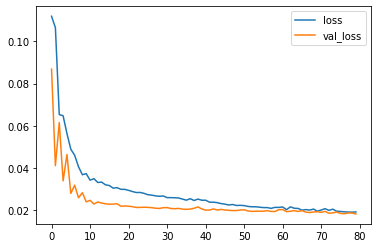

In [ ]:
plt.plot(r.history['loss'], label='loss')
plt.plot(r.history['val_loss'], label='val_loss')
plt.legend()

In [ ]:
validation_target = Y[-N//2:]
validation_predictions = []

i = -N//2
while len(validation_predictions) < len(validation_target):
  p = model.predict(X[i].reshape(1,-1,1), verbose=False)[0,0]
  i += 1
  validation_predictions.append(p)

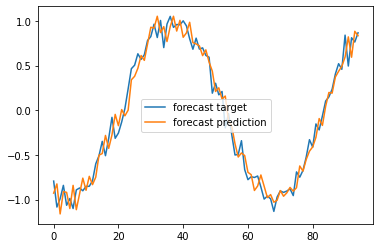

In [ ]:
plt.plot(validation_target, label='forecast target')
plt.plot(validation_predictions, label='forecast prediction')
plt.legend()

In [ ]:
validation_target = Y[-N//2:]
validation_predictions = []

last_x = X[-N//2]

while len(validation_predictions) < len(validation_target):
  p = model.predict(last_x.reshape(1,-1,1), verbose=False)[0,0]
  validation_predictions.append(p)
  last_x = np.roll(last_x, -1)
  last_x[-1] = p

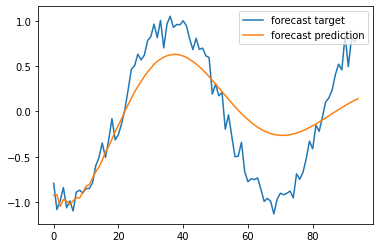

In [ ]:
plt.plot(validation_target, label='forecast target')
plt.plot(validation_predictions, label='forecast prediction')
plt.legend()